In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
data = pd.read_excel('Preliminary college year.xlsx')

In [3]:
data.shape

(106, 33)

In [4]:
data

,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,Number of Peer Mentor Meetings Attended,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)",Reason for not Completing Connect,"Retained F17-F18? (1=yes, 0=no)",Reason not Retained
0,2.595,970.0,White,F,0,1,0.0,1,1,2,...,2,2.0,0.660,2.200,1.788,18,0,academic dismissal after S18 semester,0,academic dismissal after S18 semester
1,2.637,1020.0,White,F,0,1,0.0,1,1,2,...,1,2.0,1.567,1.660,1.625,18,0,academic dismissal after S18 semester,0,academic dismissal after S18 semester
2,2.803,930.0,Black/African American,F,1,1,1.0,1,0,1,...,2,3.0,2.425,2.250,2.338,24,1,NaN,0,financial
3,2.354,1080.0,Hispanic/Latino,M,0,1,1.0,1,0,1,...,2,0.0,0.925,NaN,NaN,6,0,academic dismissal after F17 semester,0,academic dismissal after F17 semester
4,2.850,880.0,White,F,1,1,1.0,0,0,2,...,3,3.0,3.200,1.680,2.250,18,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2.412,960.0,White,M,0,1,1.0,1,0,2,...,4,3.0,3.080,3.340,3.210,30,1,NaN,1,NaN
102,2.107,1220.0,Not Specified,M,0,1,1.0,1,0,1,...,7,2.0,2.175,2.494,2.357,28,1,NaN,1,NaN
103,2.319,950.0,White,M,1,1,1.0,1,1,1,...,3,1.0,1.925,1.740,1.822,24,1,NaN,1,NaN
104,2.021,1140.0,White,M,0,1,1.0,1,0,2,...,5,3.0,1.660,1.825,1.950,21,1,NaN,1,NaN


In [5]:
data = data.drop(['Reason for not Completing Connect', 'Reason not Retained', 'Retained F17-F18? (1=yes, 0=no)',
                 'Receptivity to Institutional Help (percentile score before start of semester)', 
                 'Receptivity to Personal Counseling (percentile score before start of semester)', 
                 'Receptivity to Academic Assistance (percentile score before start of semester)',
                 'Receptivity to Social Engagement (percentile score before start of semester)', 
                 'Receptivity to Career Guidance ((percentile score before start of semester)',
                 'Receptivity to Financial Guidance (percentile score before start of semester)',
                 'F17 GPA', 'S18 GPA', 'CUM GPA', 'Number of Credits Earned', 'Attended Orientation? (1=yes, 0=no)'], axis=1)

In [6]:
data = pd.get_dummies(data, columns=['Gender','Federal Ethnic Group'])

In [7]:
bool_col = ['Gender_F', 'Gender_M', 'Federal Ethnic Group_Asian', 
            'Federal Ethnic Group_Black/African American', 'Federal Ethnic Group_Hispanic/Latino', 
            'Federal Ethnic Group_Not Specified', 'Federal Ethnic Group_Two or more races', 'Federal Ethnic Group_White']
data[bool_col] = data[bool_col].astype(int)

In [8]:
data = data.drop(['Gender_M','Gender_F','Federal Ethnic Group_Asian'], axis=1) #, 'Federal Ethnic Group_Not Specified'

In [9]:
data['Completed Connect? (1=yes, 0=no)'] = data['Completed Connect? (1=yes, 0=no)'].replace('0, contract for fall', 1)
data['Completed Connect? (1=yes, 0=no)'] = data['Completed Connect? (1=yes, 0=no)'].astype(int)

In [10]:
data.isna().sum()

High School GPA                                                                               0
SAT Score                                                                                     4
Pell Grant Eligible? (1=yes, 0=no)                                                            0
Attended Experience Day? (1=yes, 0=no)                                                        1
Resident/Commuter (1=resident, 0=commuter)                                                    0
Athlete? (1=yes, 0=no)                                                                        0
Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)     0
Dropout Proneness (percentile score before start of semester)                                13
Predicted Academic Difficulty (percentile score before start of semester)                    13
Educational Stress (percentile score before start of semester)                               13
Desire to Transfer (percentile score bef

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(87, 22)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 105
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   High School GPA                                                                            87 non-null     float64
 1   SAT Score                                                                                  87 non-null     float64
 2   Pell Grant Eligible? (1=yes, 0=no)                                                         87 non-null     int64  
 3   Attended Experience Day? (1=yes, 0=no)                                                     87 non-null     float64
 4   Resident/Commuter (1=resident, 0=commuter)                                                 87 non-null     int64  
 5   Athlete? (1=yes, 0=no)                                  

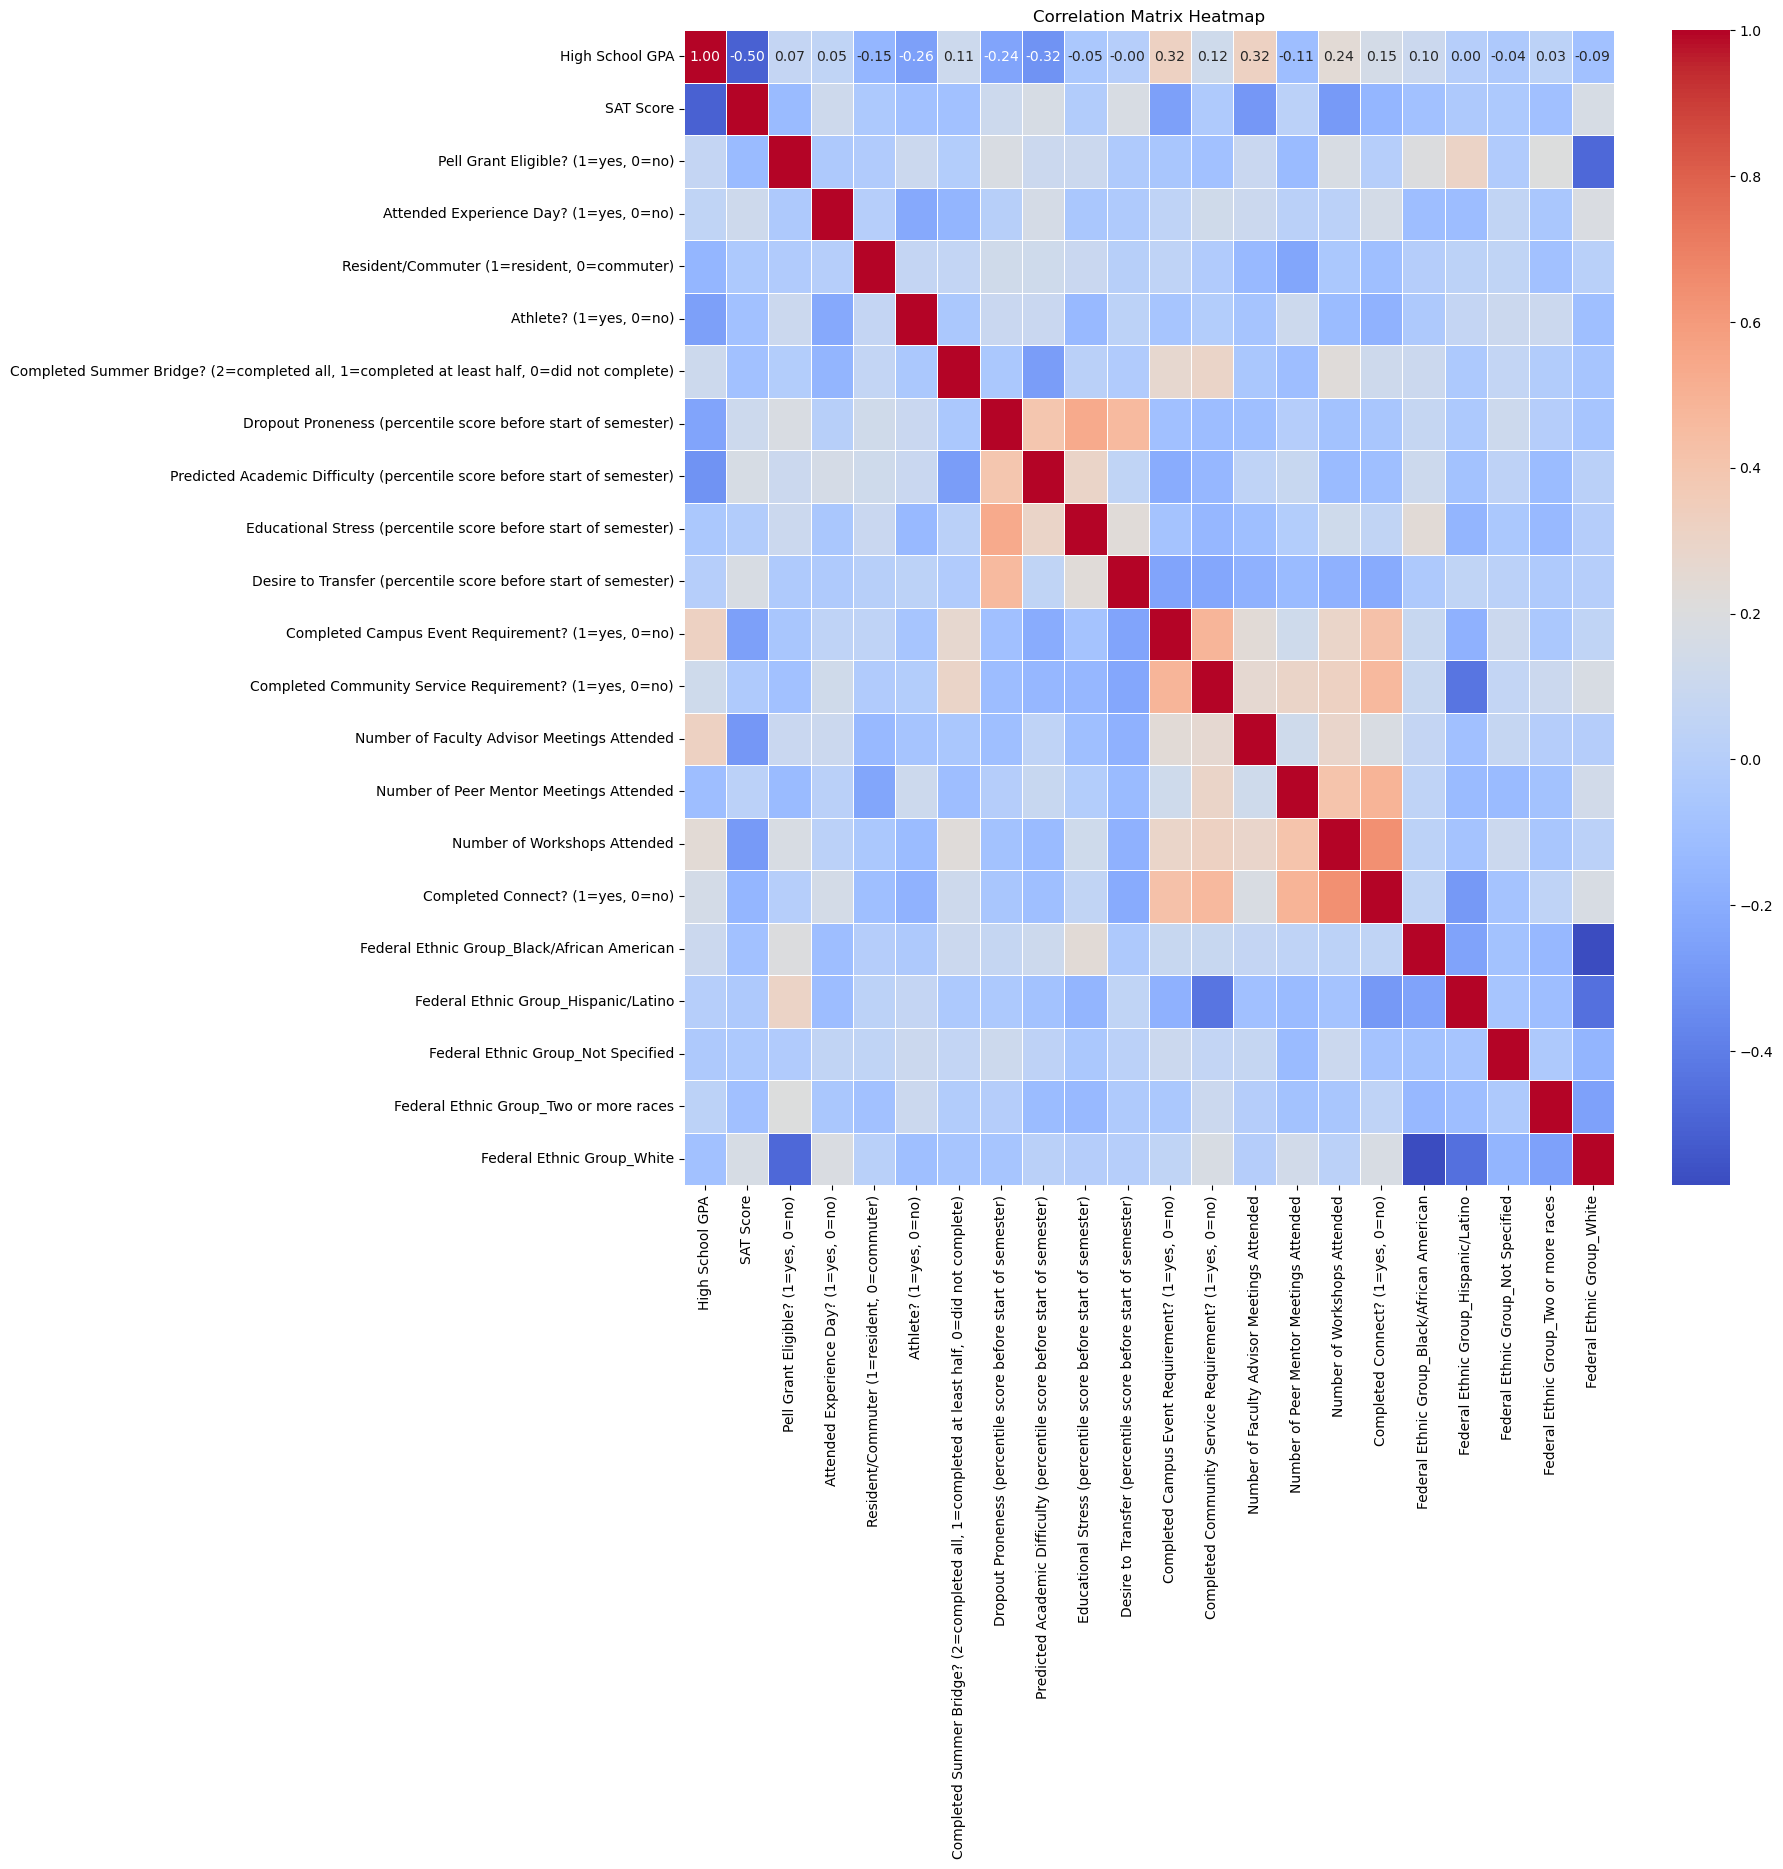

In [14]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
corr_matrix['Completed Connect? (1=yes, 0=no)']

High School GPA                                                                              0.150285
SAT Score                                                                                   -0.151737
Pell Grant Eligible? (1=yes, 0=no)                                                           0.003601
Attended Experience Day? (1=yes, 0=no)                                                       0.152096
Resident/Commuter (1=resident, 0=commuter)                                                  -0.107413
Athlete? (1=yes, 0=no)                                                                      -0.171713
Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)    0.117650
Dropout Proneness (percentile score before start of semester)                               -0.062073
Predicted Academic Difficulty (percentile score before start of semester)                   -0.105858
Educational Stress (percentile score before start of semester)                    

In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

predictors = data.drop(columns=['Completed Connect? (1=yes, 0=no)'])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Predictor"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

In [17]:
vif_data

,Predictor,VIF
0,High School GPA,2.085642
1,SAT Score,1.791802
2,"Pell Grant Eligible? (1=yes, 0=no)",1.767950
3,"Attended Experience Day? (1=yes, 0=no)",1.226023
4,"Resident/Commuter (1=resident, 0=commuter)",1.239535
5,"Athlete? (1=yes, 0=no)",1.396264
6,"Completed Summer Bridge? (2=completed all, 1=c...",1.423161
7,Dropout Proneness (percentile score before sta...,2.259907
8,Predicted Academic Difficulty (percentile scor...,1.628391
9,Educational Stress (percentile score before st...,1.893403


In [18]:
# Remove predictors with VIF above a certain threshold (e.g., 5)
threshold = 5
collinear_vars = vif_data[vif_data["VIF"] > threshold]["Predictor"]
df = data
df.drop(columns=collinear_vars, inplace=True)

In [19]:
df.shape

(87, 17)

In [20]:
df.columns

Index(['High School GPA', 'SAT Score', 'Pell Grant Eligible? (1=yes, 0=no)',
       'Attended Experience Day? (1=yes, 0=no)',
       'Resident/Commuter (1=resident, 0=commuter)', 'Athlete? (1=yes, 0=no)',
       'Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)',
       'Dropout Proneness (percentile score before start of semester)',
       'Predicted Academic Difficulty (percentile score before start of semester)',
       'Educational Stress (percentile score before start of semester)',
       'Desire to Transfer (percentile score before start of semester)',
       'Completed Campus Event Requirement? (1=yes, 0=no)',
       'Completed Community Service Requirement? (1=yes, 0=no)',
       'Number of Faculty Advisor Meetings Attended',
       'Number of Peer Mentor Meetings Attended',
       'Number of Workshops Attended', 'Completed Connect? (1=yes, 0=no)'],
      dtype='object')

In [21]:
x = df.drop('Completed Connect? (1=yes, 0=no)', axis=1)
y = df['Completed Connect? (1=yes, 0=no)']

In [22]:
model = sm.Logit(y, sm.add_constant(x))
results = model.fit( maxiter=5000)
results.summary()

Optimization terminated successfully.
         Current function value: 0.200755
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                  
============================================================================================
Dep. Variable:     Completed Connect? (1=yes, 0=no)   No. Observations:                   87
Model:                                        Logit   Df Residuals:                       70
Method:                                         MLE   Df Model:                           16
Date:                              Tue, 02 Apr 2024   Pseudo R-squ.:                  0.6592
Time:                                      00:09:26   Log-Likelihood:                -17.466
converged:                                     True   LL-Null:                       -51.243
Covariance Type:                          nonrobust   LLR p-value:                 2.664e-08
=============================================================================================================================================================
                                                                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        22.0848     18.324      1.205      0.228     -13.829      57.999
High School GPA                                                                              -2.9283      2.968     -0.987      0.324      -8.745       2.888
SAT Score                                                                                    -0.0114      0.010     -1.155      0.248      -0.031       0.008
Pell Grant Eligible? (1=yes, 0=no)                                                           -1.1806      1.309     -0.902      0.367      -3.745       1.384
Attended Experience Day? (1=yes, 0=no)                                                        2.0168      1.645      1.226      0.220      -1.206       5.240
Resident/Commuter (1=resident, 0=commuter)                                                   -1.0436      4.196     -0.249      0.804      -9.268       7.181
Athlete? (1=yes, 0=no)                                                                       -2.7442      1.719     -1.596      0.110      -6.114       0.625
Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)    -1.5385      1.629     -0.945      0.345      -4.731       1.654
Dropout Proneness (percentile score before start of semester)                                 0.0118      0.032      0.370      0.712      -0.051       0.074
Predicted Academic Difficulty (percentile score before start of semester)                    -0.0464      0.039     -1.184      0.236      -0.123       0.030
Educational Stress (percentile score before start of semester)                               -0.0023      0.021     -0.107      0.915      -0.044       0.040
Desire to Transfer (percentile score before start of semester)                               -0.0616      0.036     -1.690      0.091      -0.133       0.010
Completed Campus Event Requirement? (1=yes, 0=no)                                             2.0764      1.453      1.429      0.153      -0.772       4.925
Completed Community Service Requirement? (1=yes, 0=no)                                        2.0443      1.735      1.178      0.239      -1.356       5.444
Number of Faculty Advisor Meetings Attended                                                  -0.7472      0.433     -1.727      0.084      -1.595       0.101
Number of Peer Mentor Meetings Attended                                                       1.2314      0.819      1.503      0.133      -0.375       2.837
Number of Workshops Attended                                                                  2.0475      0.794  

In [23]:
pred = results.predict(sm.add_constant(x))

In [24]:
pred

0      0.000859
2      0.997867
3      0.001882
4      0.969039
5      0.999936
         ...   
100    0.999012
101    0.999995
103    0.572183
104    0.999962
105    0.002532
Length: 87, dtype: float64

In [25]:
binary_pred = (pred >= 0.5).astype(int)

In [26]:
binary_pred

0      0
2      1
3      0
4      1
5      1
      ..
100    1
101    1
103    1
104    1
105    0
Length: 87, dtype: int32

In [27]:
binary_pred.value_counts()

1    64
0    23
Name: count, dtype: int64

In [28]:
accuracy = accuracy_score(y, binary_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9195402298850575


In [29]:
print('Accuracy: {:.2f}'.format(accuracy_score(y, binary_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y, binary_pred)))
print('Precision: {:.2f}'.format(precision_score(y, binary_pred)))
print('Recall: {:.2f}'.format(recall_score(y, binary_pred)))
print('f1_score: {:.2f}'.format(f1_score(y, binary_pred)))
print('AUC_ROC: {:.2f}'.format(roc_auc_score(y, pred)))

Accuracy: 0.92
Error rate: 0.08
Precision: 0.94
Recall: 0.95
f1_score: 0.94
AUC_ROC: 0.96


In [30]:
conf_matrix = confusion_matrix(y, binary_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[20  4]
 [ 3 60]]


In [31]:
class_report = classification_report(y, binary_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.94      0.95      0.94        63

    accuracy                           0.92        87
   macro avg       0.90      0.89      0.90        87
weighted avg       0.92      0.92      0.92        87

